In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


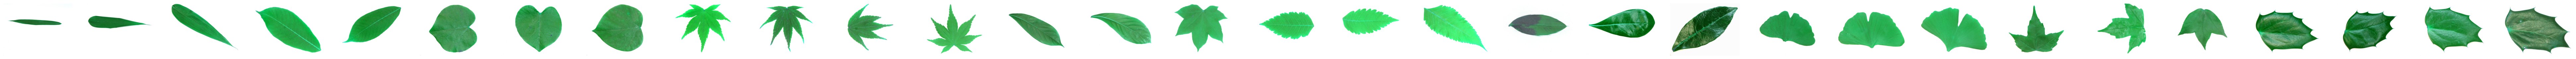

In [3]:

folder = '../Images 2'
images = []
for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder,filename))
    if img is not None:
        images.append(img)


plt.figure(figsize=(100, 50))  

for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])
    plt.axis('off')  

plt.show()

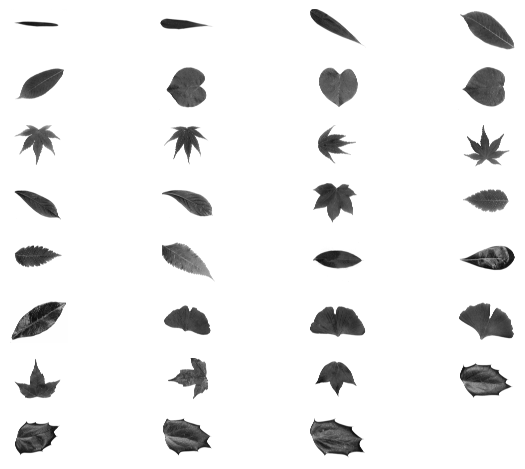

In [4]:

gray_images = []
for img in images:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_images.append(gray)

num_cols=4
num_rows=8

for i, img in enumerate(gray_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()



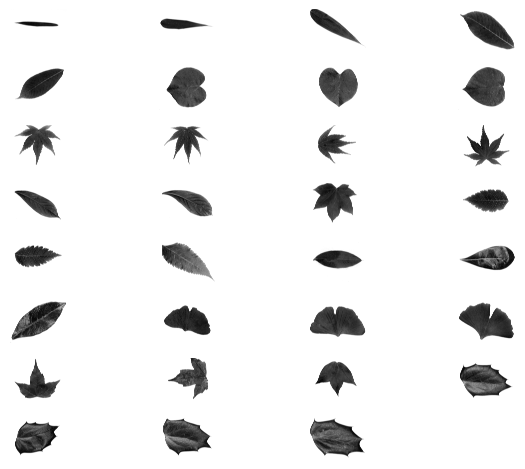

In [5]:
filtred_images = []
for img in gray_images :
    blur= cv2.GaussianBlur(img,(7,7), cv2.BORDER_DEFAULT)
    filtred_images.append(blur)

for i, img in enumerate(filtred_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')  

plt.tight_layout()  
plt.show()



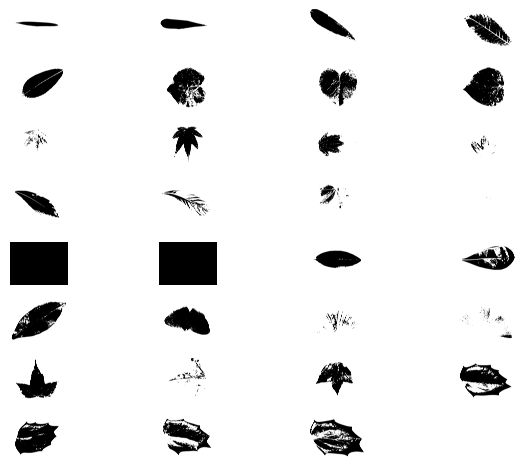

In [6]:
threshold_images = []
for img in filtred_images:
    _, threshold = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    threshold_images.append(threshold)

for i, img in enumerate(threshold_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')  

plt.tight_layout()  
plt.show()

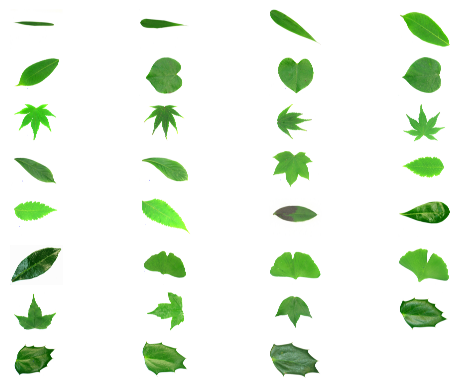

In [7]:

contour_list = []  
for img in threshold_images:
    contour, _ = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
    contour_list.append(contour)  

contour_images = []
for i, img in enumerate(images):
    img_copy = img.copy()
    cv2.drawContours(img_copy, contour[i], -1, (255, 0, 0), 3)
    contour_images.append(img_copy)

# # Display each image with contours using subplots with specified rows and columns
for i, img in enumerate(contour_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
    plt.axis('off')  # Remove axes for cleaner display



C:\Users\pc\AppData\Local\Temp\ipykernel_21292\1452831319.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,5))


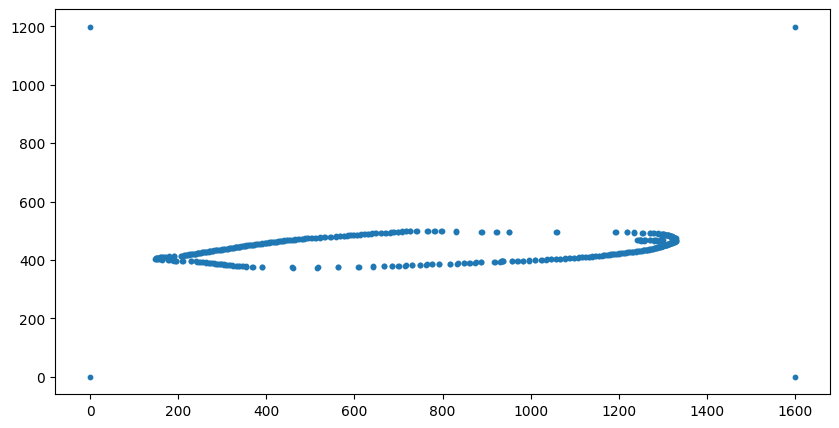

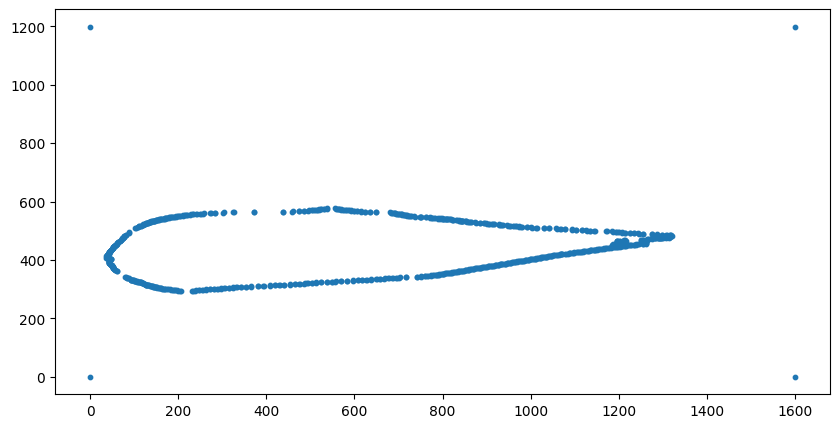

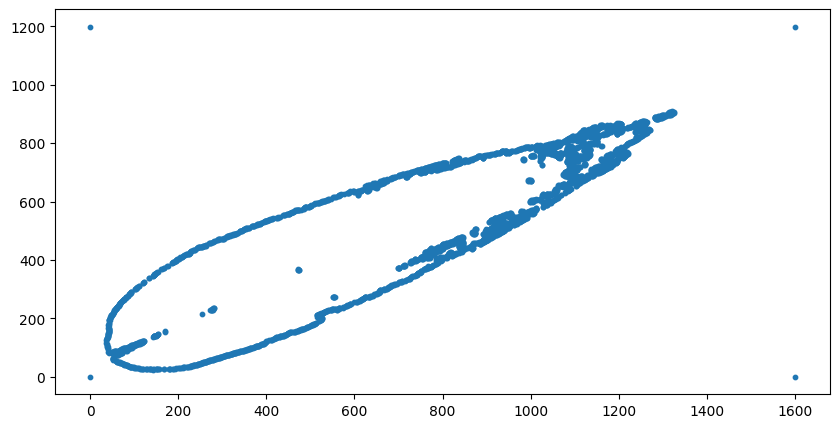

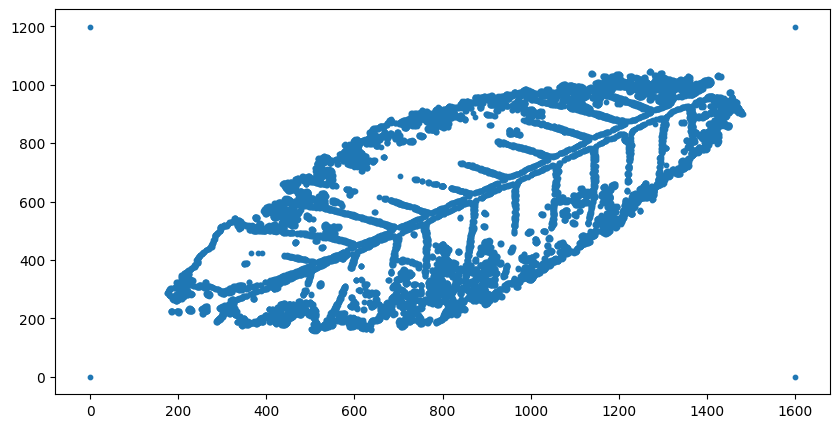

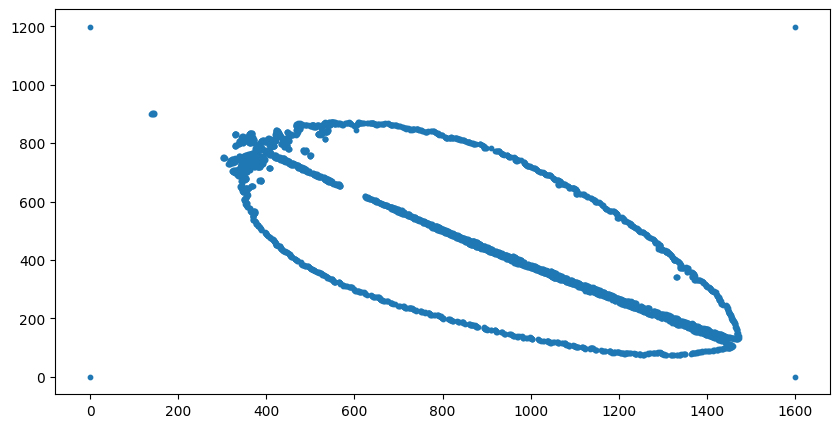

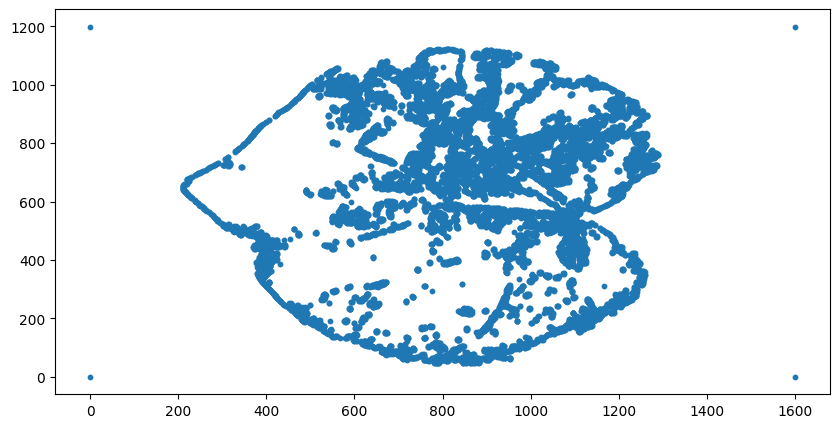

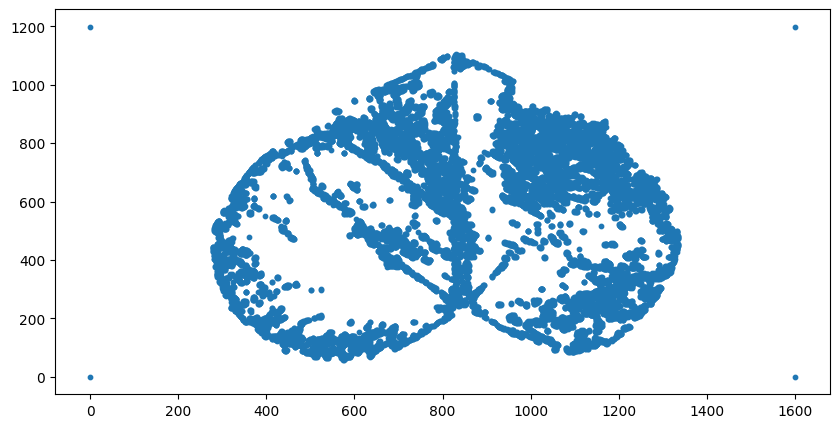

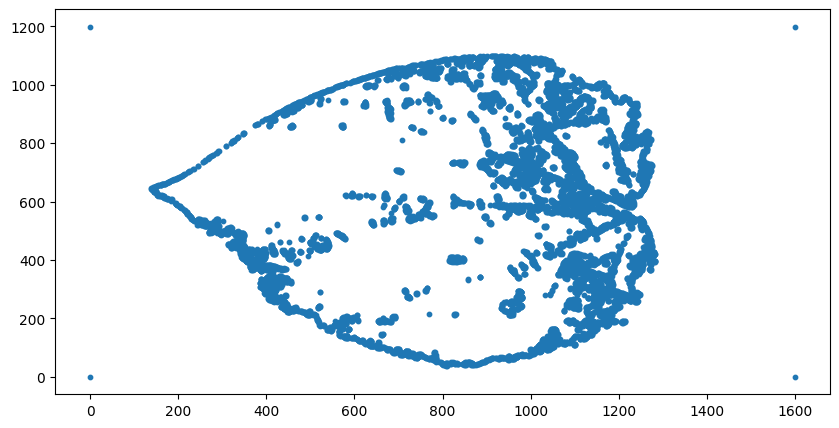

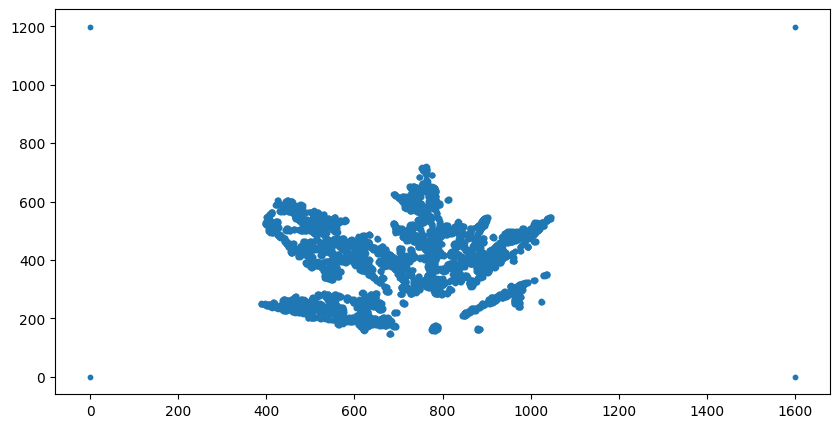

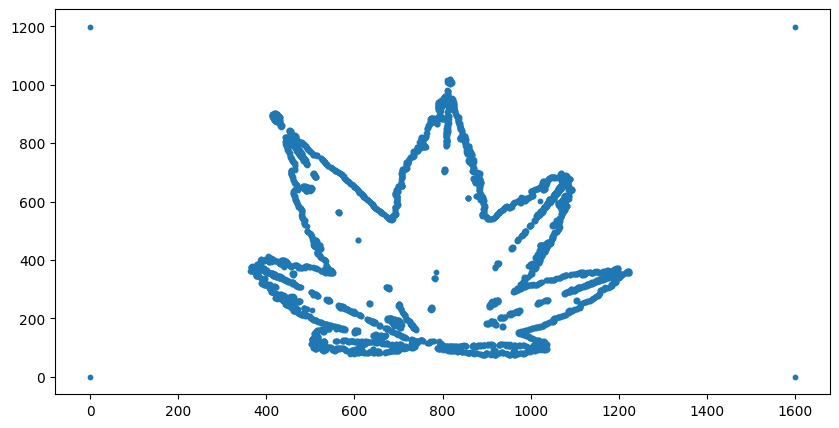

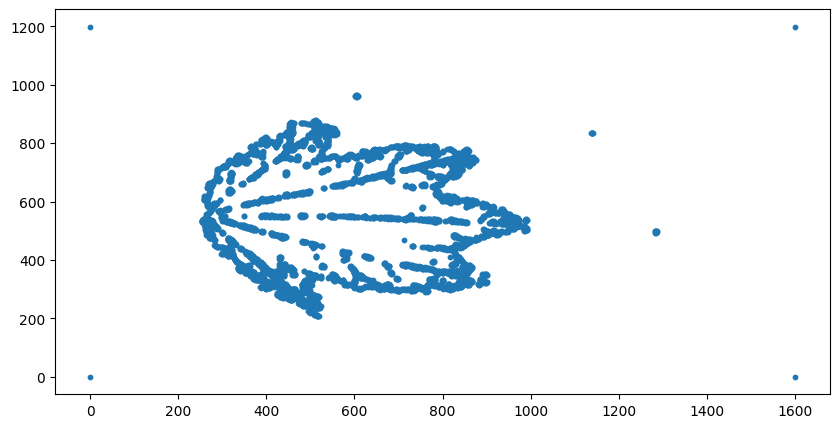

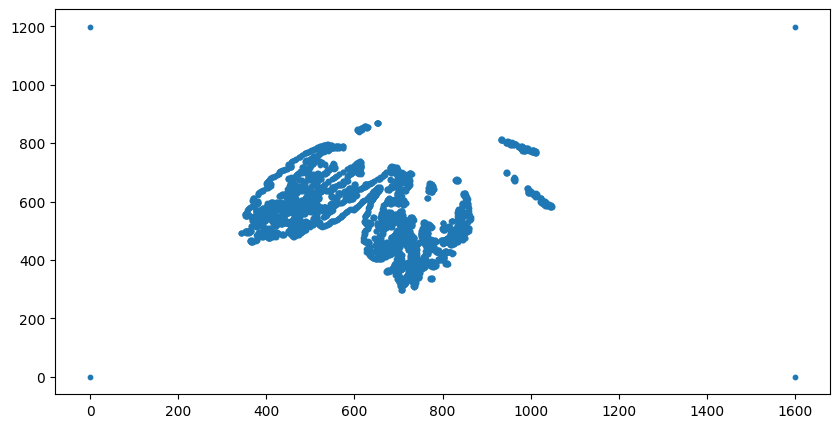

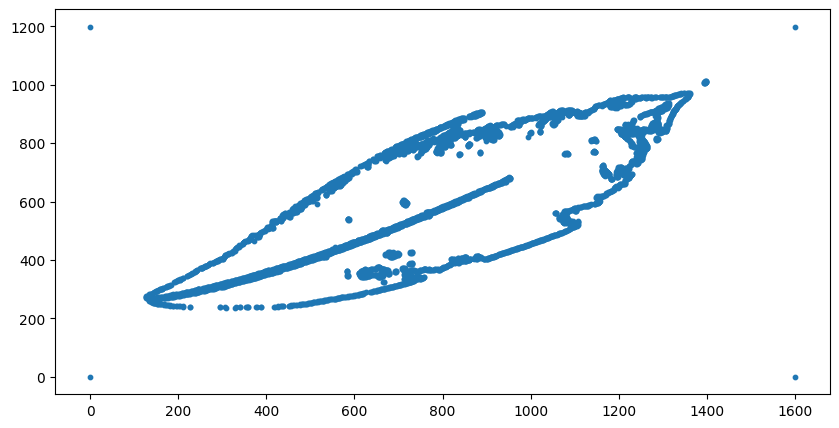

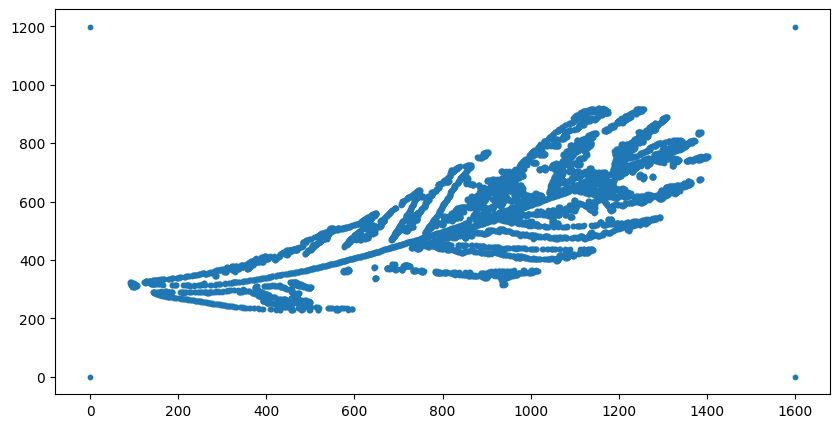

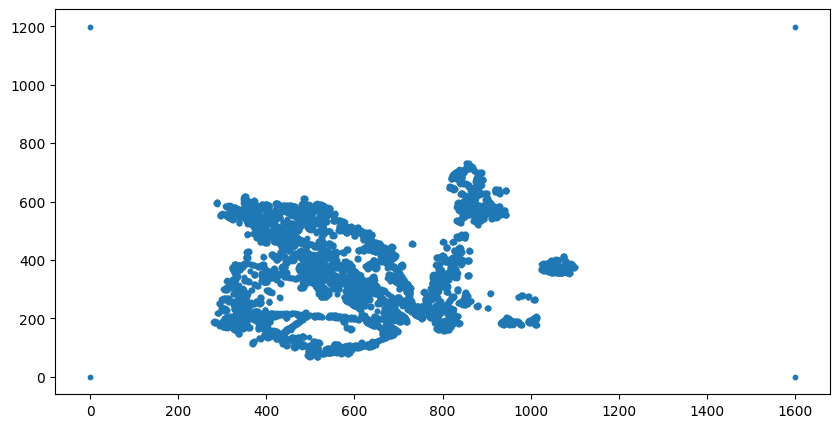

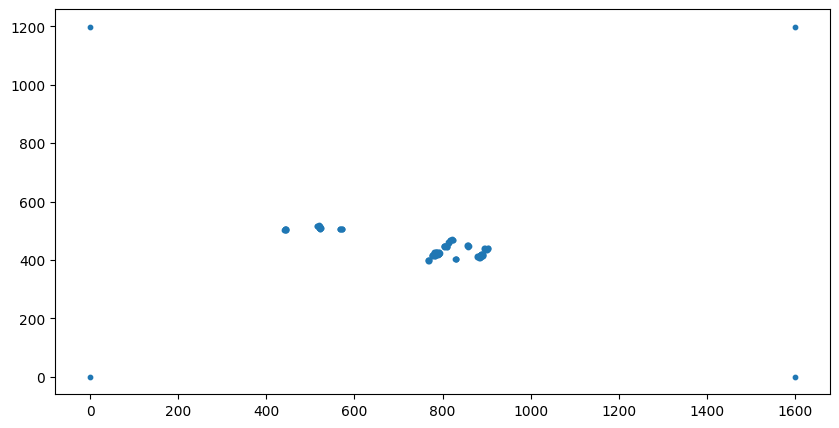

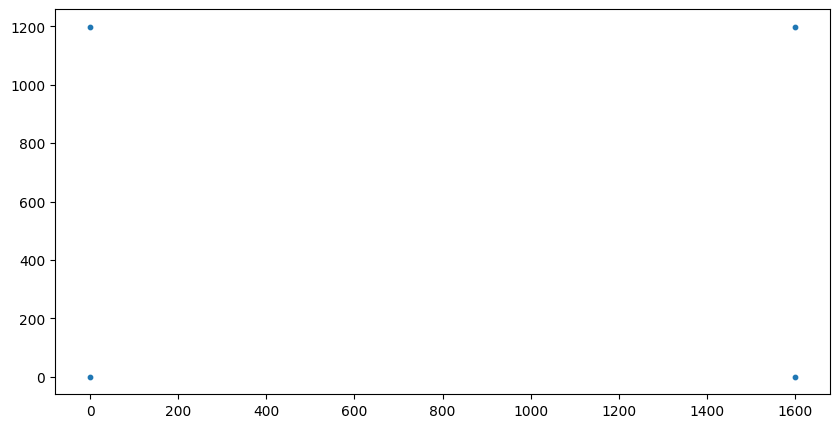

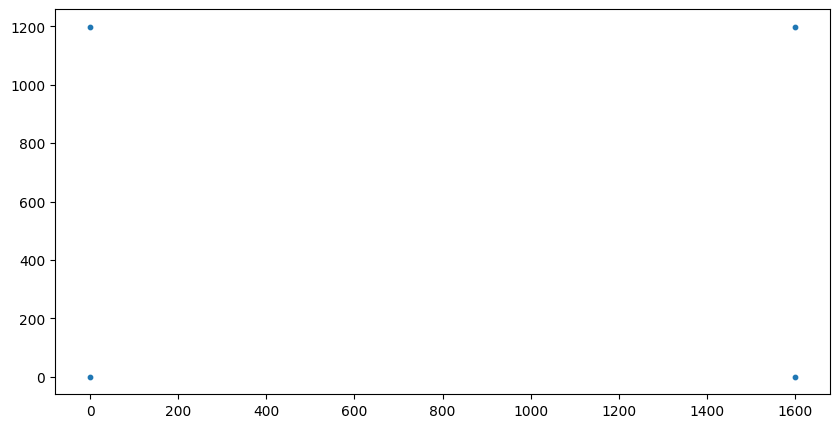

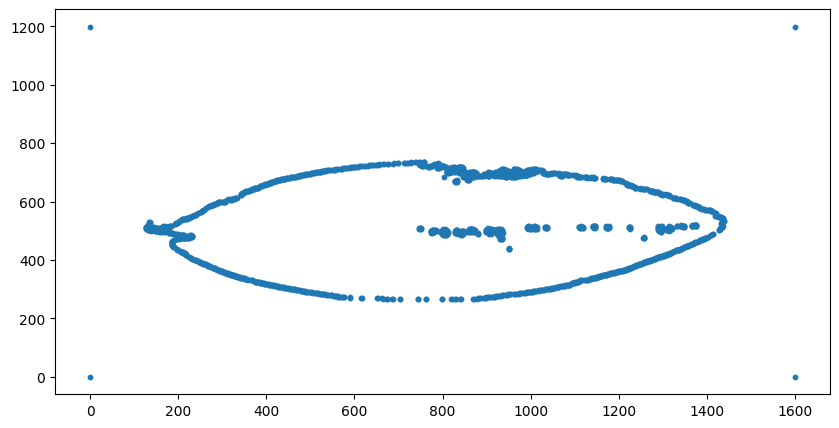

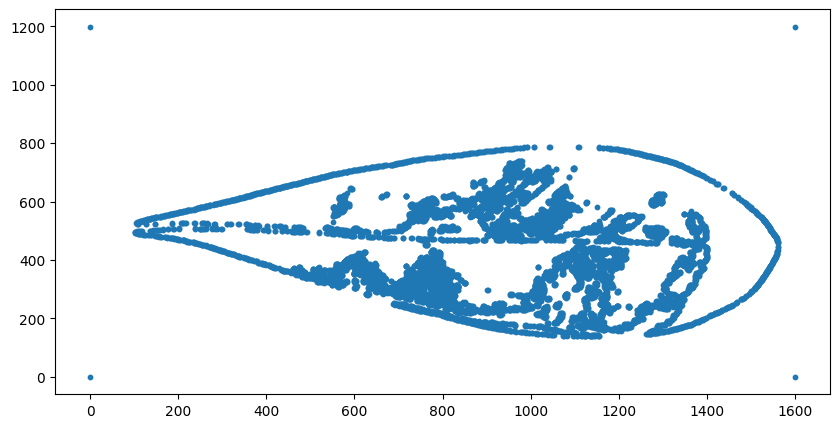

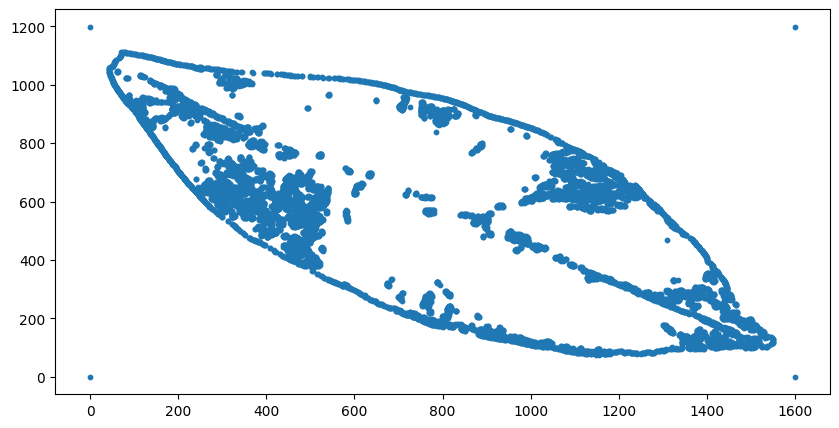

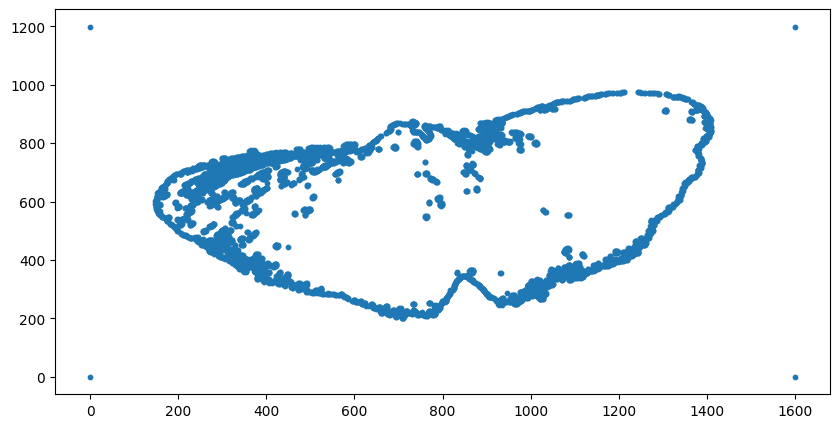

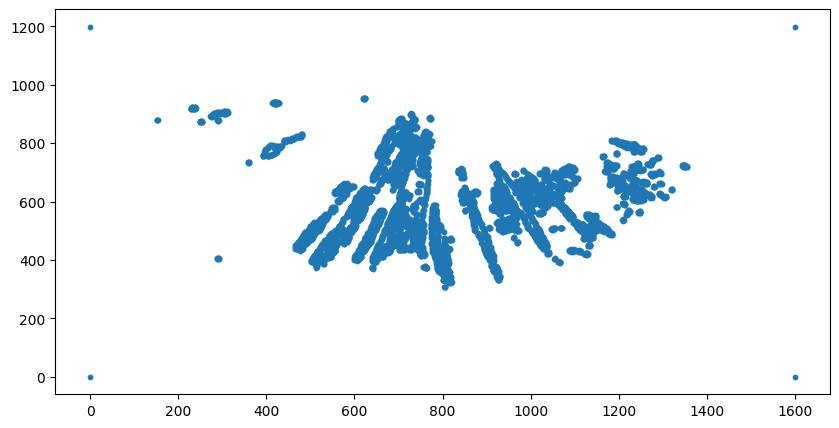

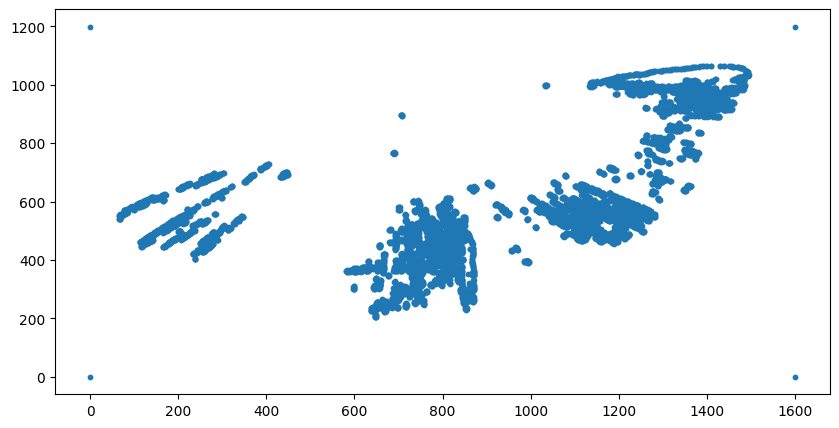

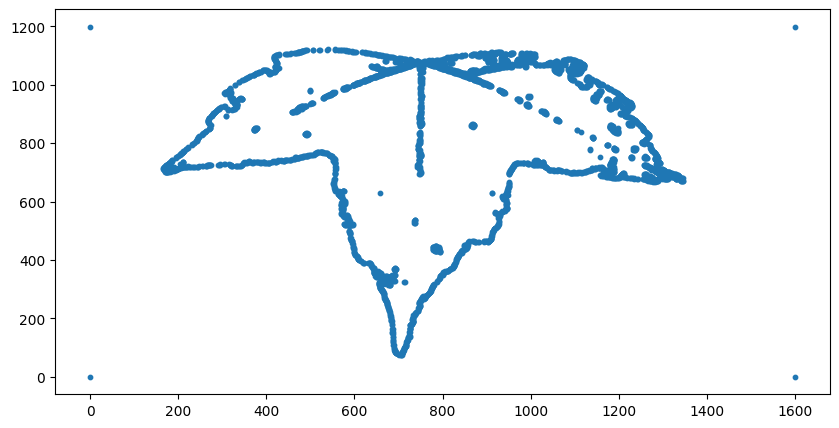

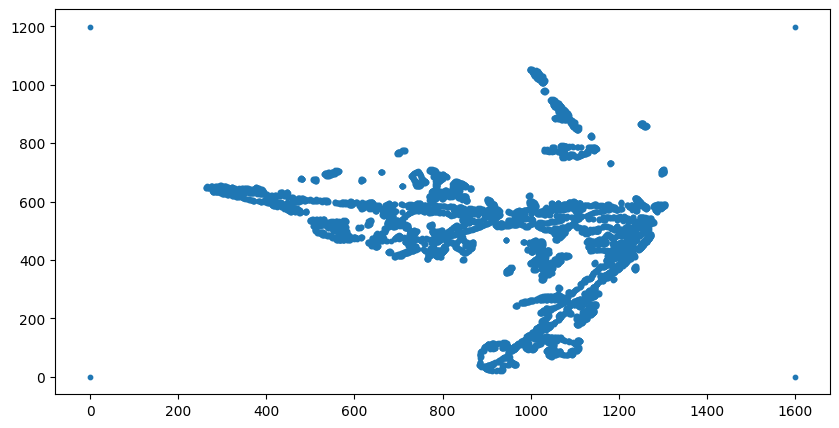

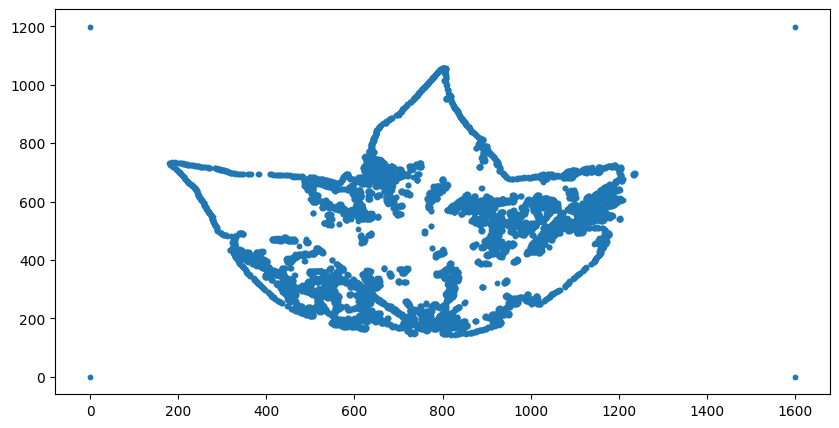

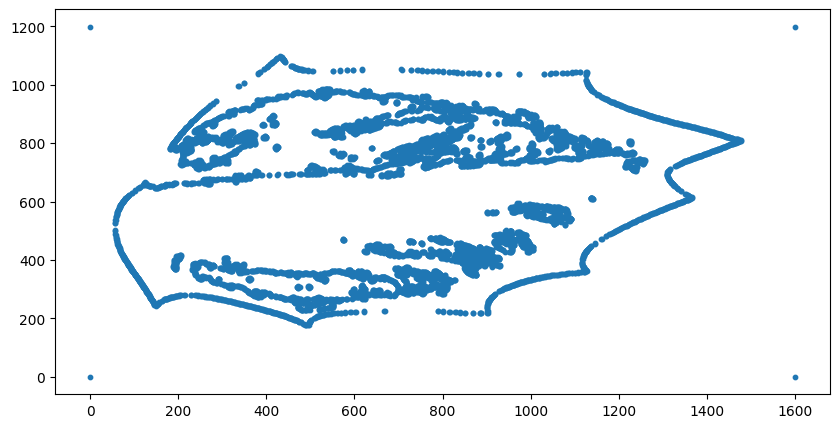

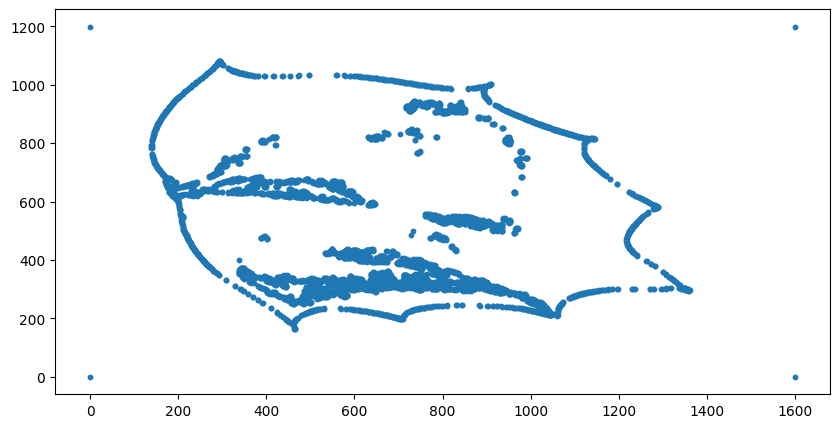

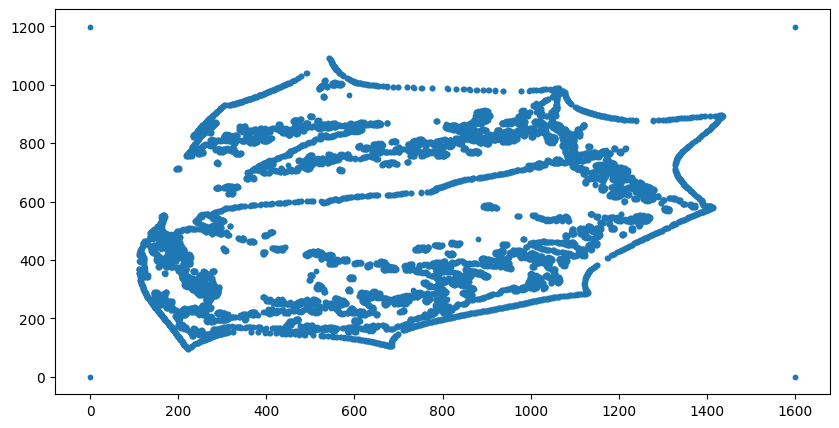

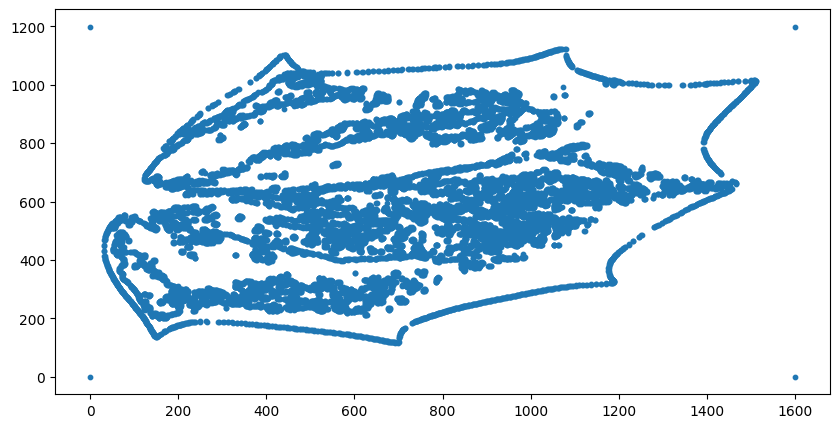

In [8]:



#extract contour points for each image
contour_points = []
for contour in contour_list:
    points = []
    for c in contour:
        for p in c:
            points.append(p)
    contour_points.append(points)

# # Display each image with contours using subplots with specified rows and columns
for i, img in enumerate(contour_images):
    plt.figure(figsize=(10,5))
    points = np.array(contour_points[i])
    plt.scatter(points[:, 0, 0], points[:, 0, 1], s=10)
plt.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_21292\2664201013.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,5))


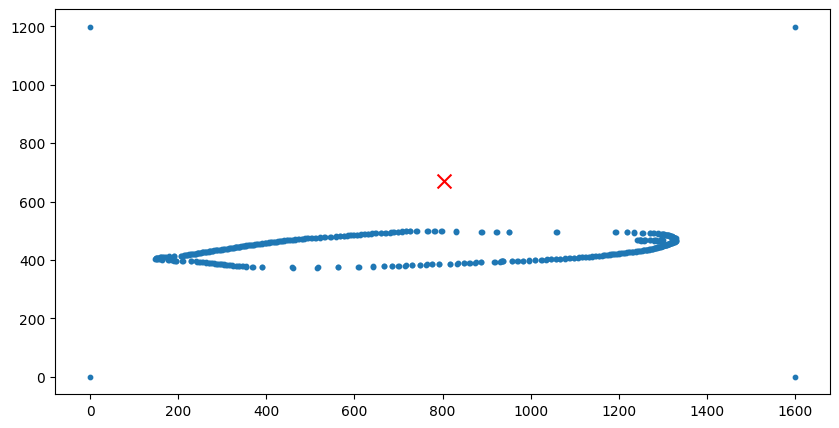

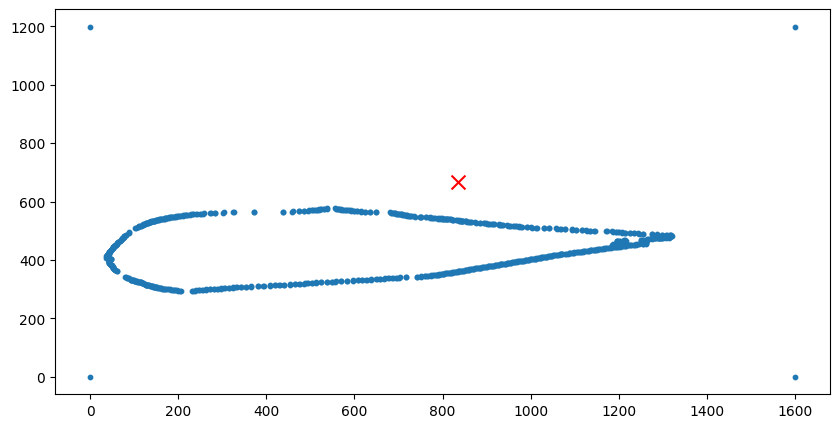

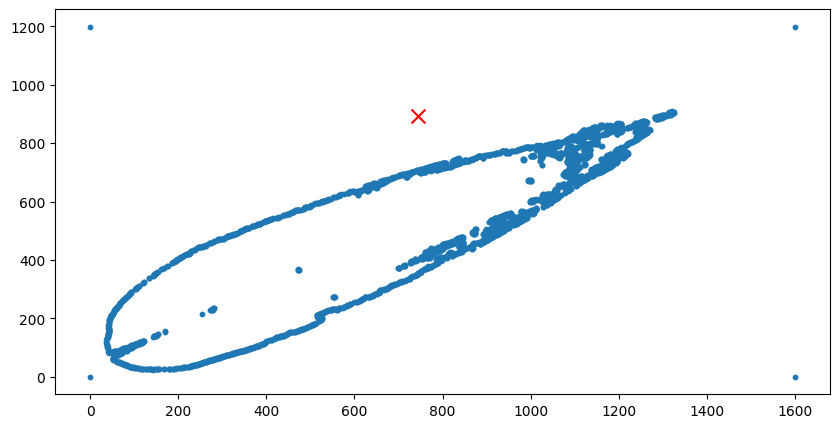

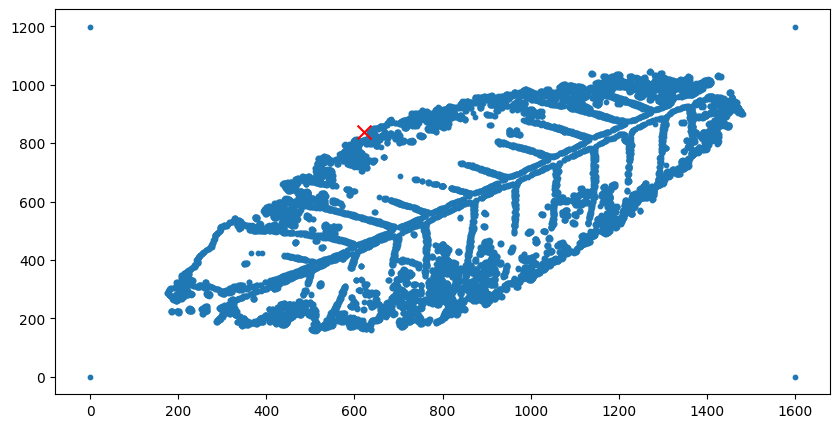

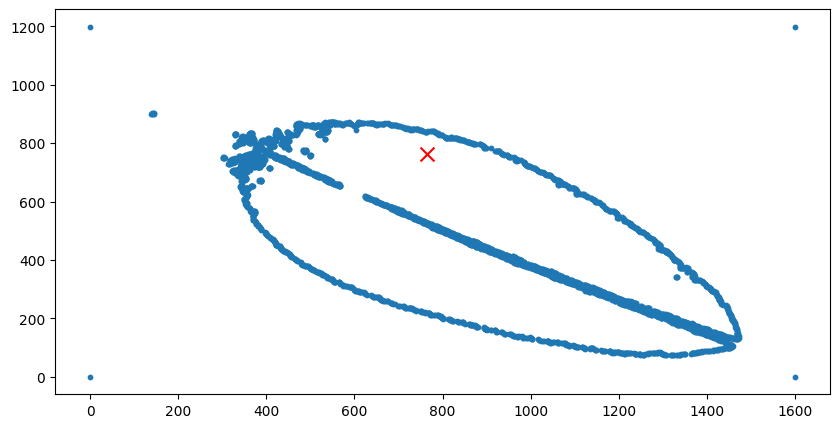

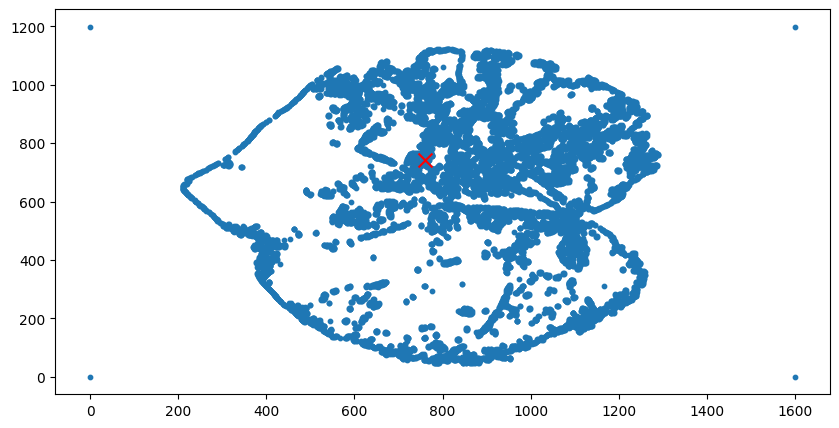

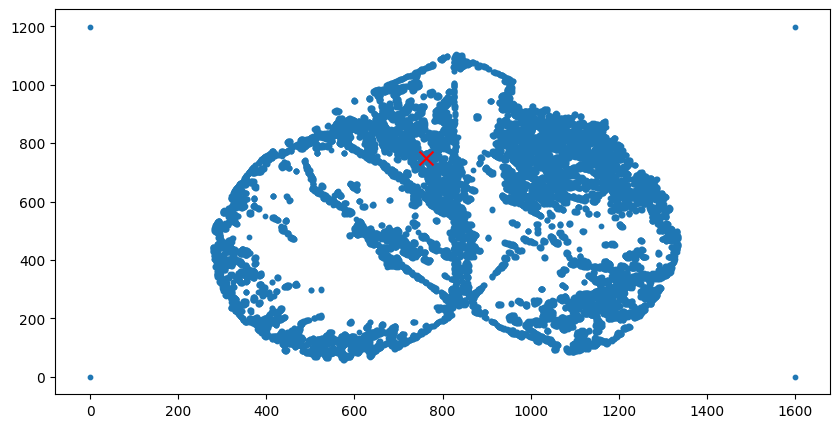

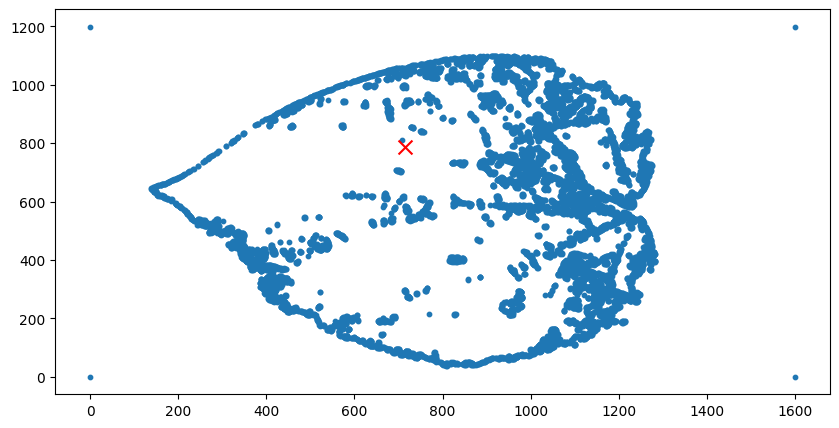

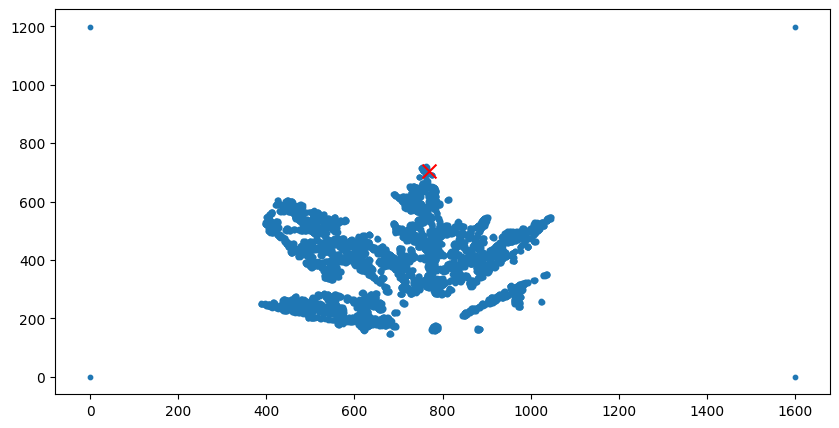

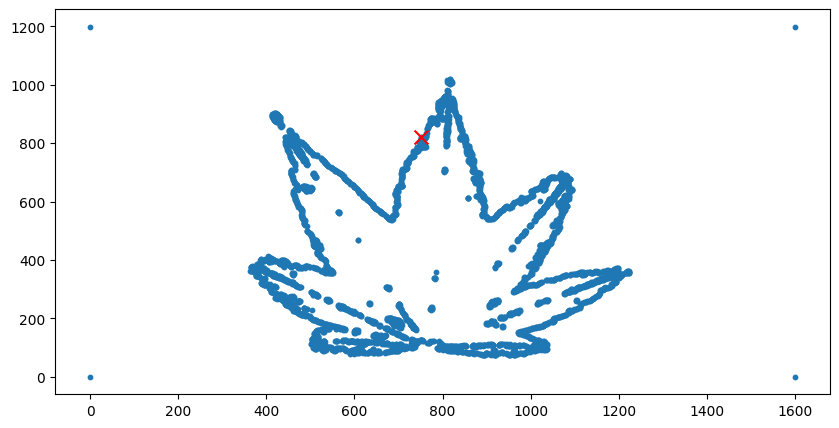

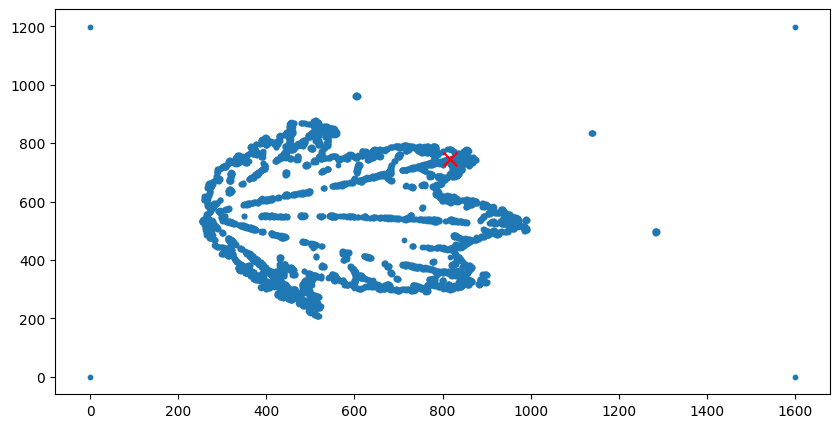

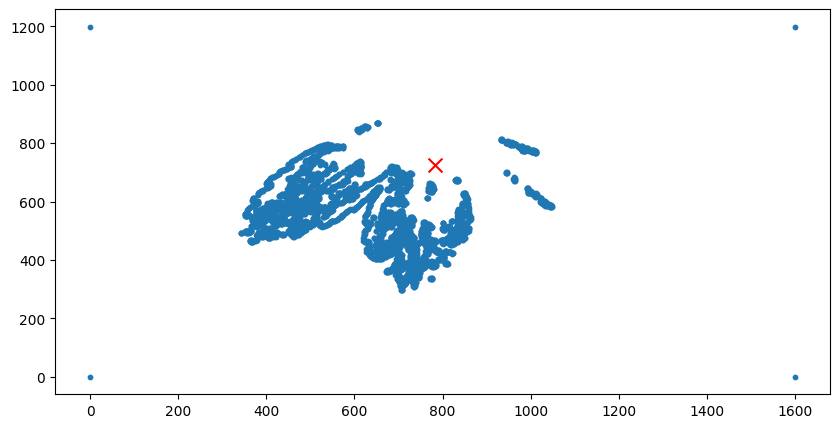

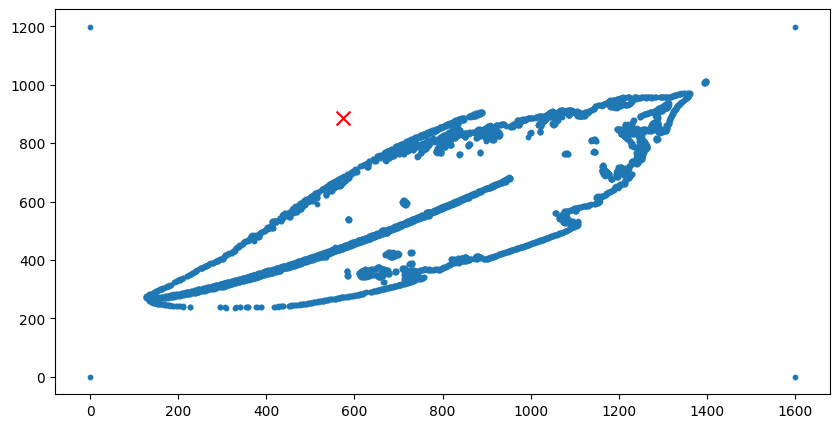

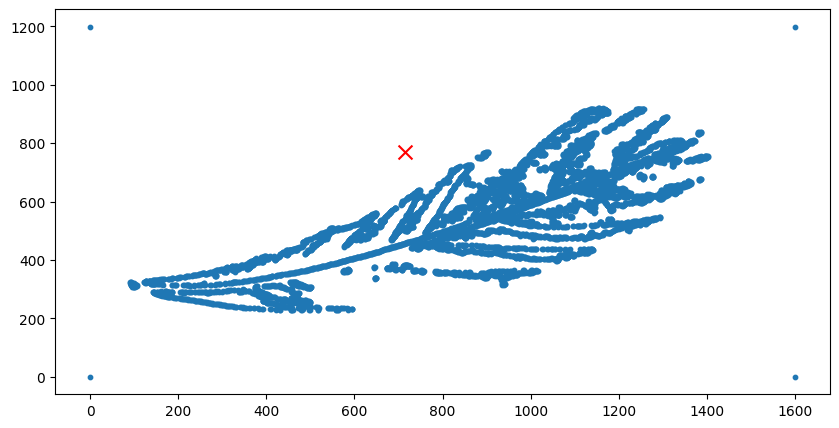

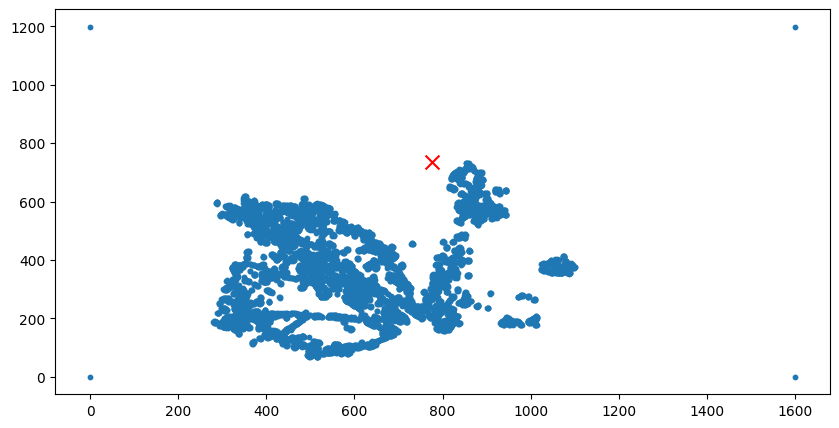

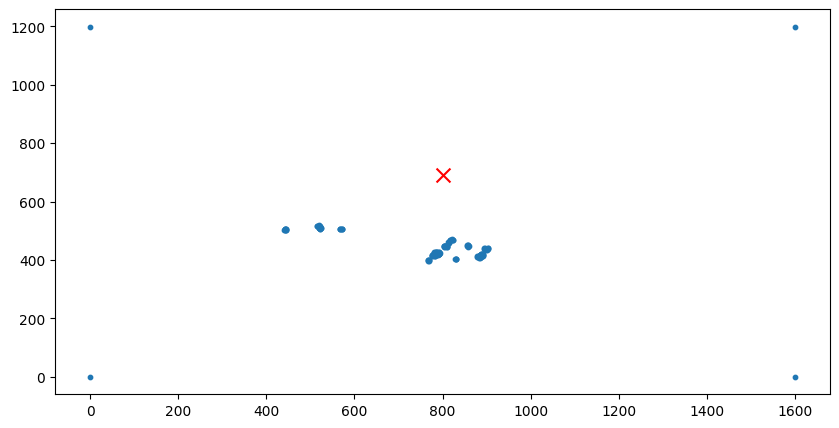

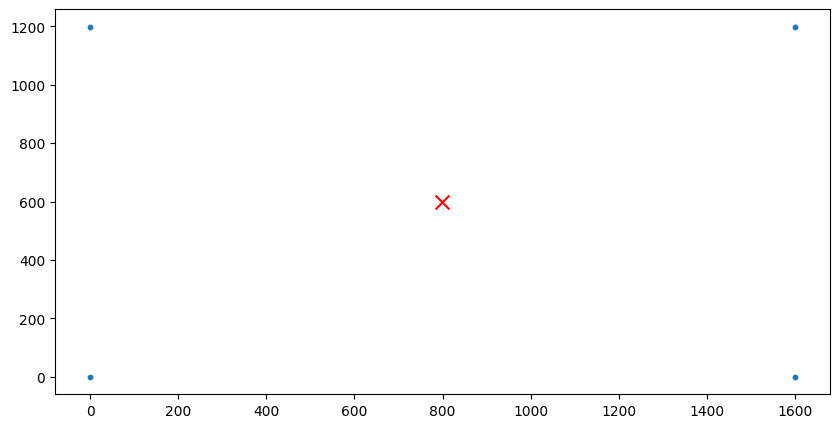

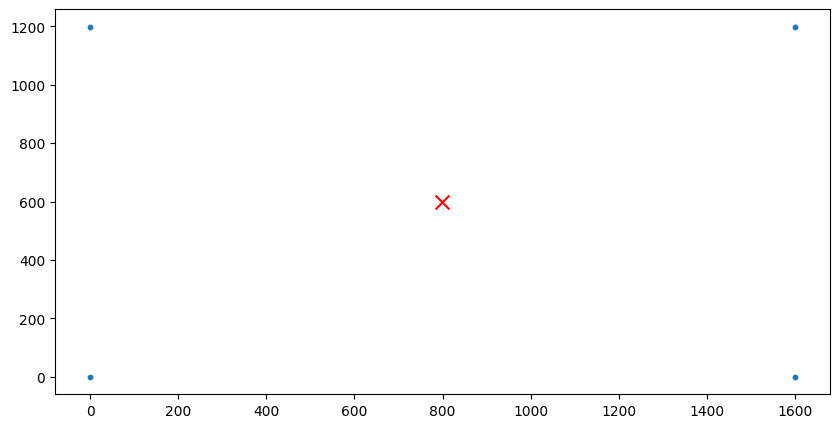

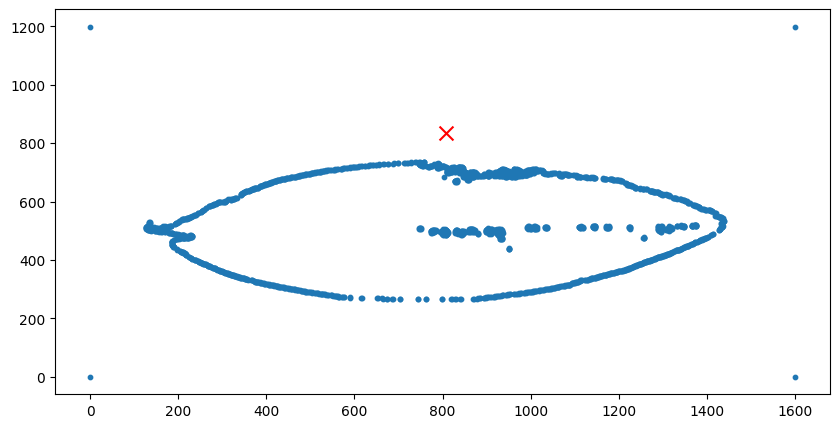

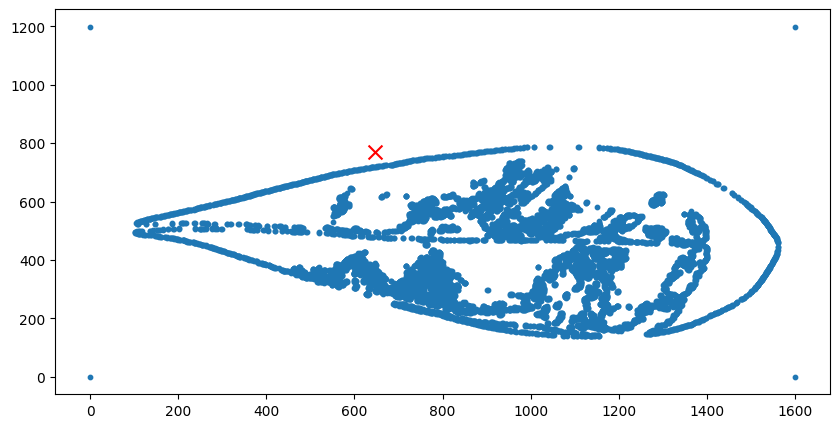

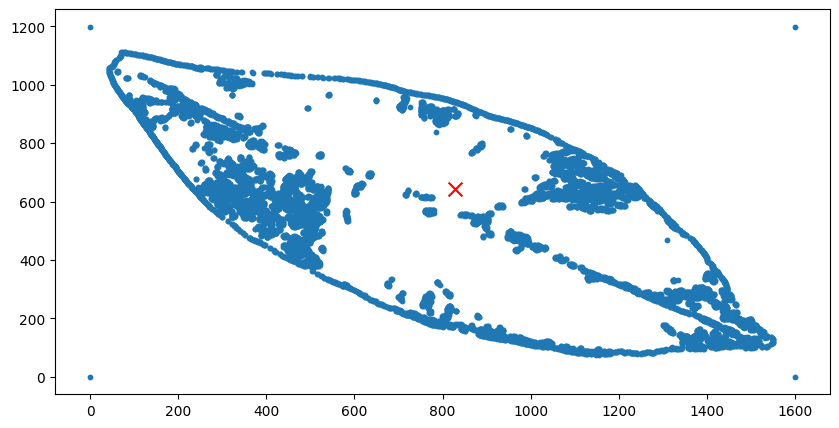

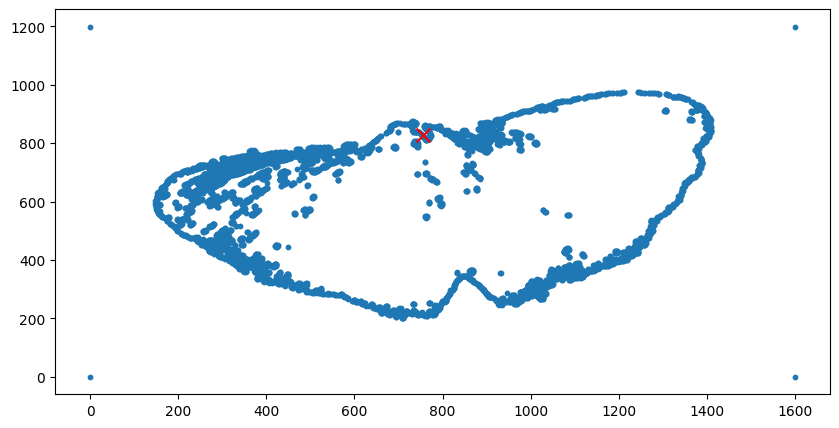

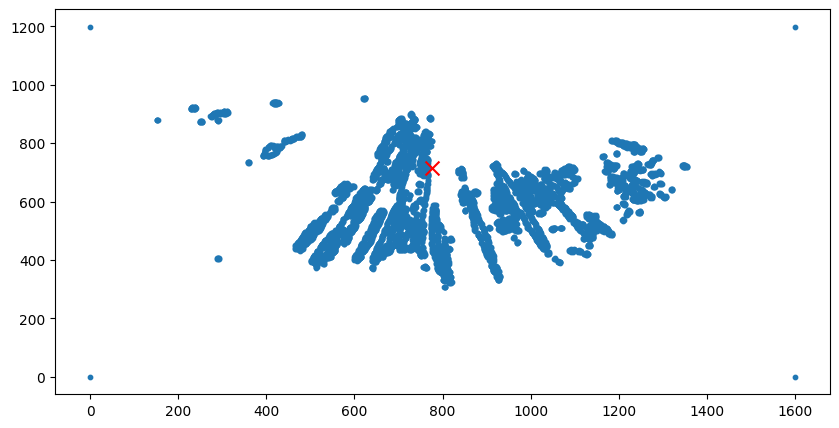

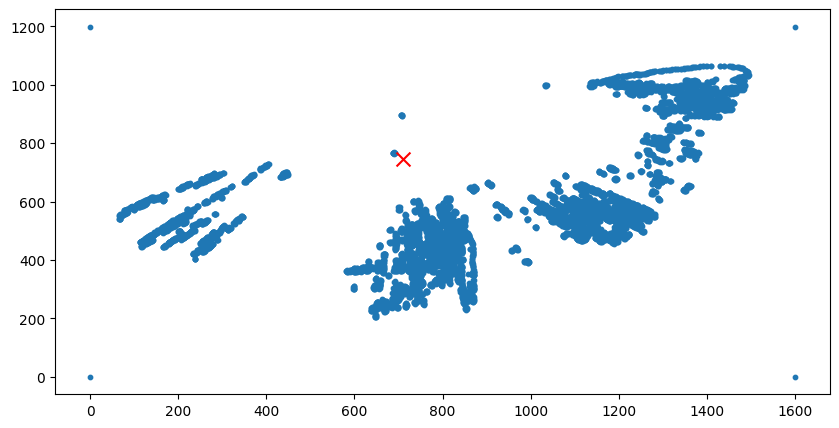

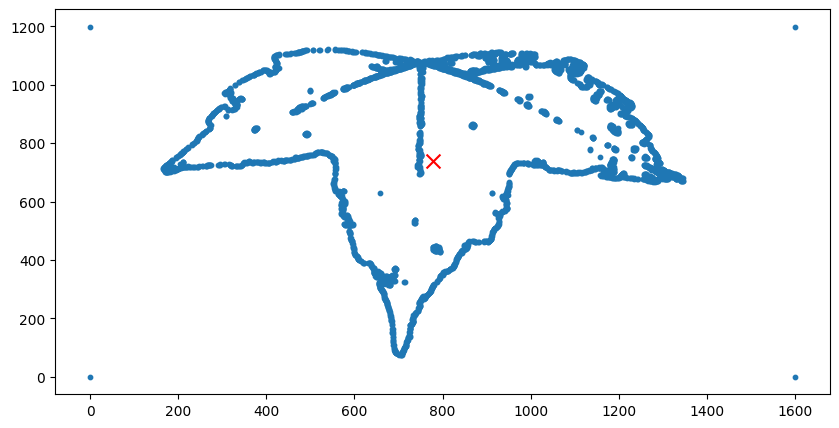

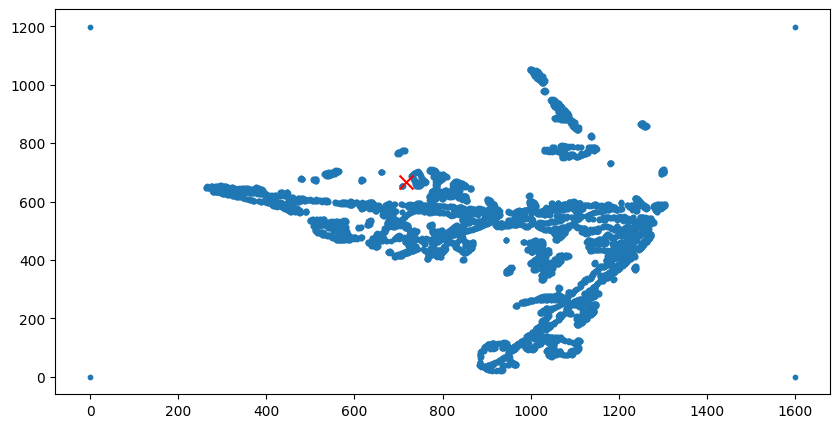

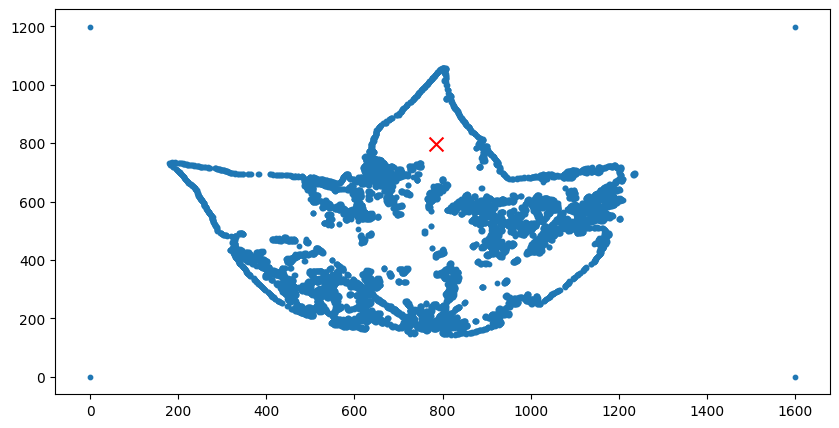

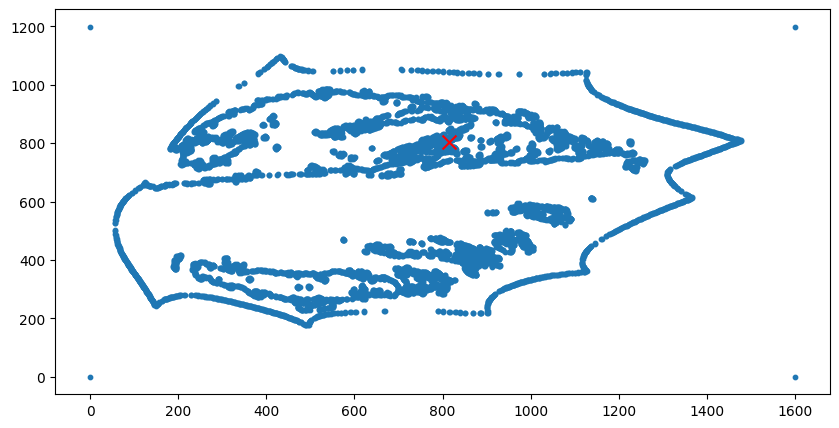

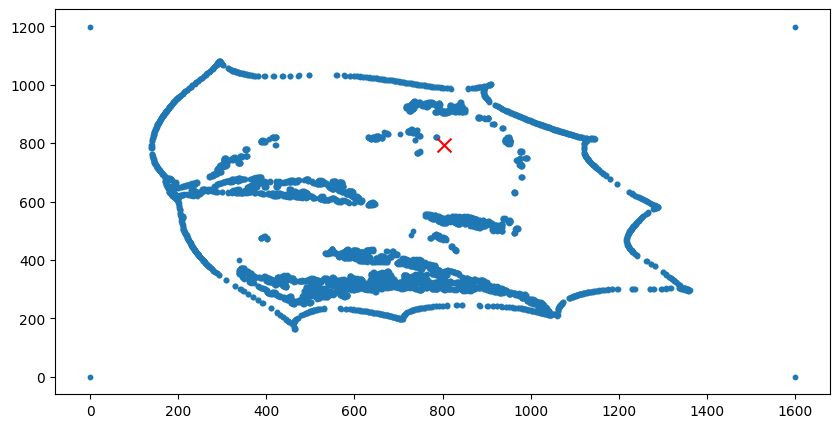

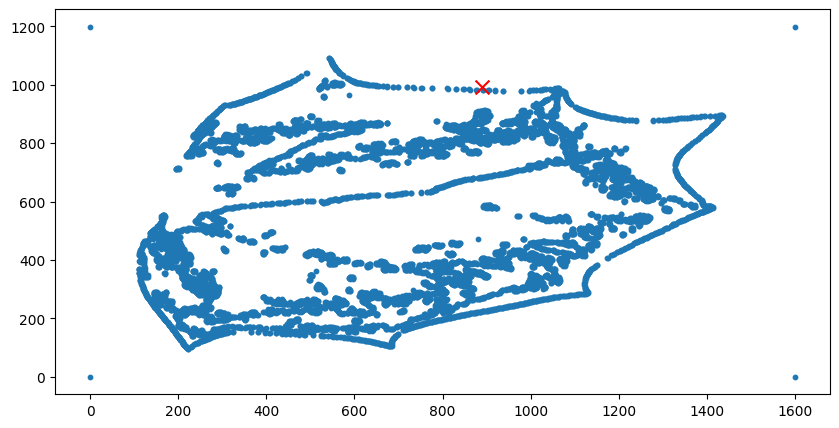

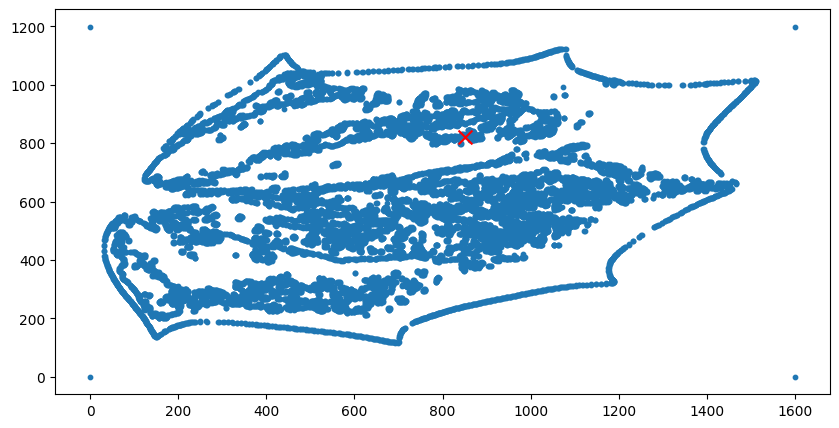

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate centroid
def flatten_contour(contour):
    flattened_contour = []
    for points in contour:
        for point in points:
            flattened_contour.append(point)
    return np.array(flattened_contour)

def calculate_centroid(contour):
    contour_array = flatten_contour(contour)
    M = cv2.moments(contour_array)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    return cx, cy



# Assuming contour_list contains contours for each image
# Assuming contour_images contains images with contours
# Assuming contour_points contains contour points for each image

# Calculate centroids for each contour
centroids = []
for contour in contour_list:
    centroid = calculate_centroid(contour)
    centroids.append(centroid)

# Display images with contours and centroids
for i, img in enumerate(contour_images):
    plt.figure(figsize=(10,5))
    points = np.array(contour_points[i])
    plt.scatter(points[:, 0, 0], points[:, 0, 1], s=10)
    
    # Plot centroid
    centroid = centroids[i]
    plt.scatter(centroid[0], centroid[1], c='red', marker='x', s=100)
    
plt.show()
